This code is for the Advanced Data Analysis and Machine Learning course
written by Aleksis Tammi 2025

Dimensional Reduction



Bike Sharing Rental Dataset Analysis
Comparison of PCA and t-SNE dimensionality reduction methods




Import Libraries

Libraries:
pandas dataframes
sklean for the methods

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Load the arff data format and process so that the strigs look correct

In [3]:

# Load dataset
data, meta = arff.loadarff('dataset.arff')
df = pd.DataFrame(data)

# Decode byte strings
for col in df.select_dtypes([object]):
    df[col] = df[col].str.decode('utf-8')

print(df.head())

   season  year  month  hour holiday  weekday workingday weather  temp  \
0  spring   0.0    1.0   0.0   False      6.0      False   clear  9.84   
1  spring   0.0    1.0   1.0   False      6.0      False   clear  9.02   
2  spring   0.0    1.0   2.0   False      6.0      False   clear  9.02   
3  spring   0.0    1.0   3.0   False      6.0      False   clear  9.84   
4  spring   0.0    1.0   4.0   False      6.0      False   clear  9.84   

   feel_temp  humidity  windspeed  casual  registered  count  
0     14.395      0.81        0.0     3.0        13.0   16.0  
1     13.635      0.80        0.0     8.0        32.0   40.0  
2     13.635      0.80        0.0     5.0        27.0   32.0  
3     14.395      0.75        0.0     3.0        10.0   13.0  
4     14.395      0.75        0.0     0.0         1.0    1.0  


Precondition data:
- Separate responses and features
- numerate all non numeric variablevalues
- Normalize with standard scaler

In [3]:

# Prepare features and response variables

# Response variables in the last column
target_col = df.columns[-1]
    
y = df[target_col].values
X = df.drop(columns=[target_col])

# Remove casual and registered columns if they exist
cols_to_drop = [col for col in ['casual', 'registered'] if col in X.columns]
if cols_to_drop:
    X = X.drop(columns=cols_to_drop)

# Convert categorical variables to numeric
X = pd.get_dummies(X, drop_first=True)



In [4]:

# Split and standardize
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Make PCA dimensions reduction.
The presentations with 5 and 10 PCs
Plot the PCs variance plots ->
- 10PCs 85%
- 15PCs 99.9%

In [12]:

# Apply PCA with 10 components
pca_10 = PCA(n_components=10, random_state=42)
X_train_pca10 = pca_10.fit_transform(X_train_scaled)
X_test_pca10 = pca_10.transform(X_test_scaled)

# Apply PCA with 15 components
pca_15 = PCA(n_components=15, random_state=42)
X_train_pca15 = pca_15.fit_transform(X_train_scaled)
X_test_pca15 = pca_15.transform(X_test_scaled)


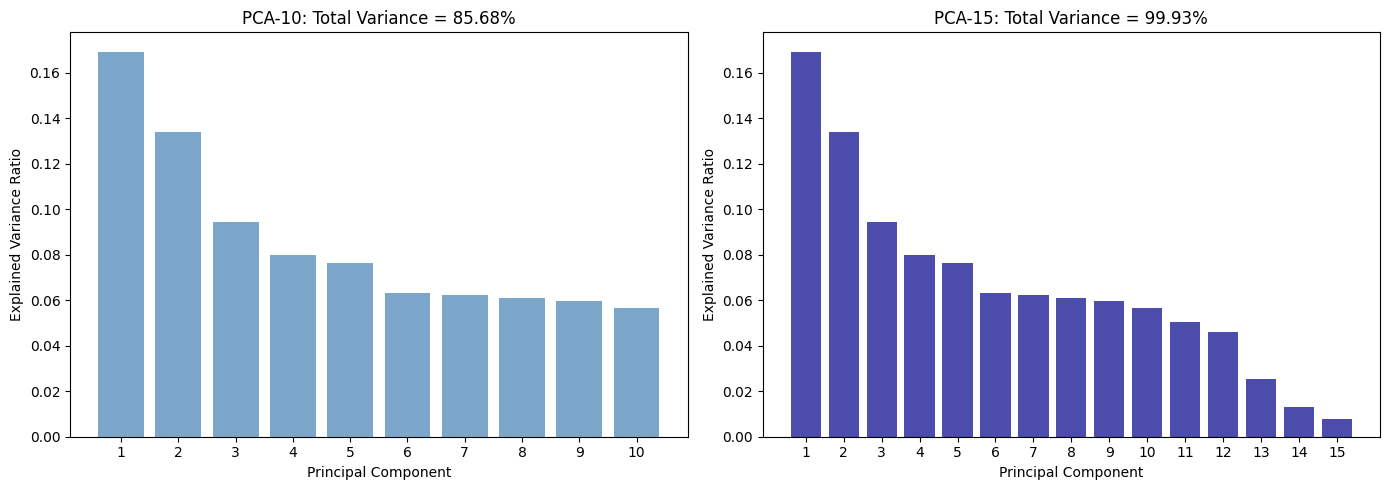

In [6]:
# Visualize PCA explained variance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PCA-10
axes[0].bar(range(1, 11), pca_10.explained_variance_ratio_, alpha=0.7, color='steelblue')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_title(f'PCA-10: Total Variance = {pca_10.explained_variance_ratio_.sum():.2%}')
axes[0].set_xticks(range(1, 11))

# PCA-15
axes[1].bar(range(1, 16), pca_15.explained_variance_ratio_, alpha=0.7, color='darkblue')
axes[1].set_xlabel('Principal Component')
axes[1].set_ylabel('Explained Variance Ratio')
axes[1].set_title(f'PCA-15: Total Variance = {pca_15.explained_variance_ratio_.sum():.2%}')
axes[1].set_xticks(range(1, 16))

plt.tight_layout()
plt.show()


Make the DR with t-SNE also:

In [7]:

# Apply t-SNE on train+test data
X_combined = np.vstack([X_train_scaled, X_test_scaled])

tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_combined_tsne = tsne.fit_transform(X_combined)

# Split back
X_train_tsne = X_combined_tsne[:len(X_train_scaled)]
X_test_tsne = X_combined_tsne[len(X_train_scaled):]


Present the visualizations (score plots) of the dimensionally reduced data.

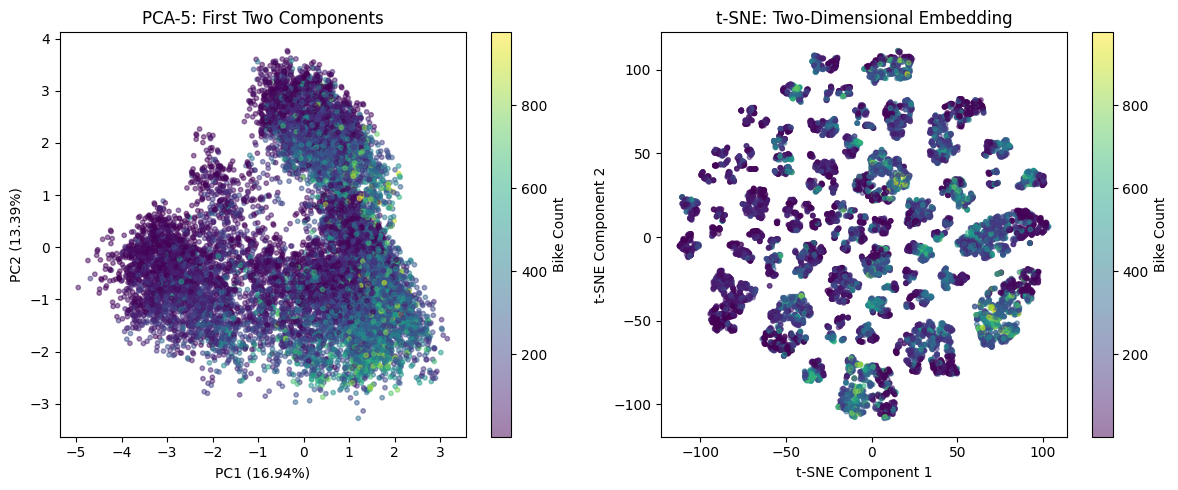

In [8]:

# Visualize dimensionality reduction results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# PCA (first 2 components)
scatter1 = axes[0].scatter(X_train_pca10[:, 0], X_train_pca10[:, 1], 
                          c=y_train, cmap='viridis', alpha=0.5, s=10)
axes[0].set_xlabel(f'PC1 ({pca_10.explained_variance_ratio_[0]:.2%})')
axes[0].set_ylabel(f'PC2 ({pca_10.explained_variance_ratio_[1]:.2%})')
axes[0].set_title('PCA-5: First Two Components')
plt.colorbar(scatter1, ax=axes[0], label='Bike Count')


# t-SNE
scatter2 = axes[1].scatter(X_train_tsne[:, 0], X_train_tsne[:, 1],
                          c=y_train, cmap='viridis', alpha=0.5, s=10)
axes[1].set_xlabel('t-SNE Component 1')
axes[1].set_ylabel('t-SNE Component 2')
axes[1].set_title('t-SNE: Two-Dimensional Embedding')
plt.colorbar(scatter2, ax=axes[1], label='Bike Count')

plt.tight_layout()
plt.show()


These plots illustrate the data in the reduced dimensionality. The PCA score plot is illustration how the bike rental activity corresponds to the 2 mist significant variance vectors PC1 and PC2. We can see that the positive side of PC1 has more color so it has these attributes like nice weather and days off work. The t-SNE on the other hand is heavily clustered and we see the distribution on the mass of the data regarding both component1 and component2. This results as a ball-like appearance. Also these clusters seem to have more color on the positive side of component1. The clusters illustrates the selected neighbourhoods of data points.

Next up training all the models (random forest) for all the dimensionally reduced datasets

In [10]:

# Train Random Forest models
rf_pca10 = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1)
rf_pca10.fit(X_train_pca10, y_train)

rf_pca15 = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1)
rf_pca15.fit(X_train_pca15, y_train)

rf_tsne = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1)
rf_tsne.fit(X_train_tsne, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Then we predict the response variables from test split to see how the models perform

In [13]:

# Make predictions
y_pred_train_pca10 = rf_pca10.predict(X_train_pca10)
y_pred_test_pca10 = rf_pca10.predict(X_test_pca10)

y_pred_train_pca15 = rf_pca15.predict(X_train_pca15)
y_pred_test_pca15 = rf_pca15.predict(X_test_pca15)

y_pred_train_tsne = rf_tsne.predict(X_train_tsne)
y_pred_test_tsne = rf_tsne.predict(X_test_tsne)


Gather evaluation metrics of different models

In [14]:

# Calculate metrics
results = []

# PCA-10
results.append({
    'Method': 'PCA-10',
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train_pca10)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test_pca10)),
    'Train MAE': mean_absolute_error(y_train, y_pred_train_pca10),
    'Test MAE': mean_absolute_error(y_test, y_pred_test_pca10),
    'Train R²': r2_score(y_train, y_pred_train_pca10),
    'Test R²': r2_score(y_test, y_pred_test_pca10)
})

# PCA-15
results.append({
    'Method': 'PCA-15',
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train_pca15)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test_pca15)),
    'Train MAE': mean_absolute_error(y_train, y_pred_train_pca15),
    'Test MAE': mean_absolute_error(y_test, y_pred_test_pca15),
    'Train R²': r2_score(y_train, y_pred_train_pca15),
    'Test R²': r2_score(y_test, y_pred_test_pca15)
})

# t-SNE
results.append({
    'Method': 't-SNE-2',
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train_tsne)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test_tsne)),
    'Train MAE': mean_absolute_error(y_train, y_pred_train_tsne),
    'Test MAE': mean_absolute_error(y_test, y_pred_test_tsne),
    'Train R²': r2_score(y_train, y_pred_train_tsne),
    'Test R²': r2_score(y_test, y_pred_test_tsne)
})

results_df = pd.DataFrame(results)


Here is presented all the infered statisticcs of the random forest models when trained with differet datas.

In [15]:

# Display results
results_df


,Method,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R²,Test R²
0,PCA-10,43.908760,112.512486,30.322364,77.819063,0.941932,0.600224
1,PCA-15,41.321957,104.908629,28.477341,72.801900,0.948572,0.652434
2,t-SNE-2,47.857620,112.871301,31.830603,75.504036,0.931017,0.597670


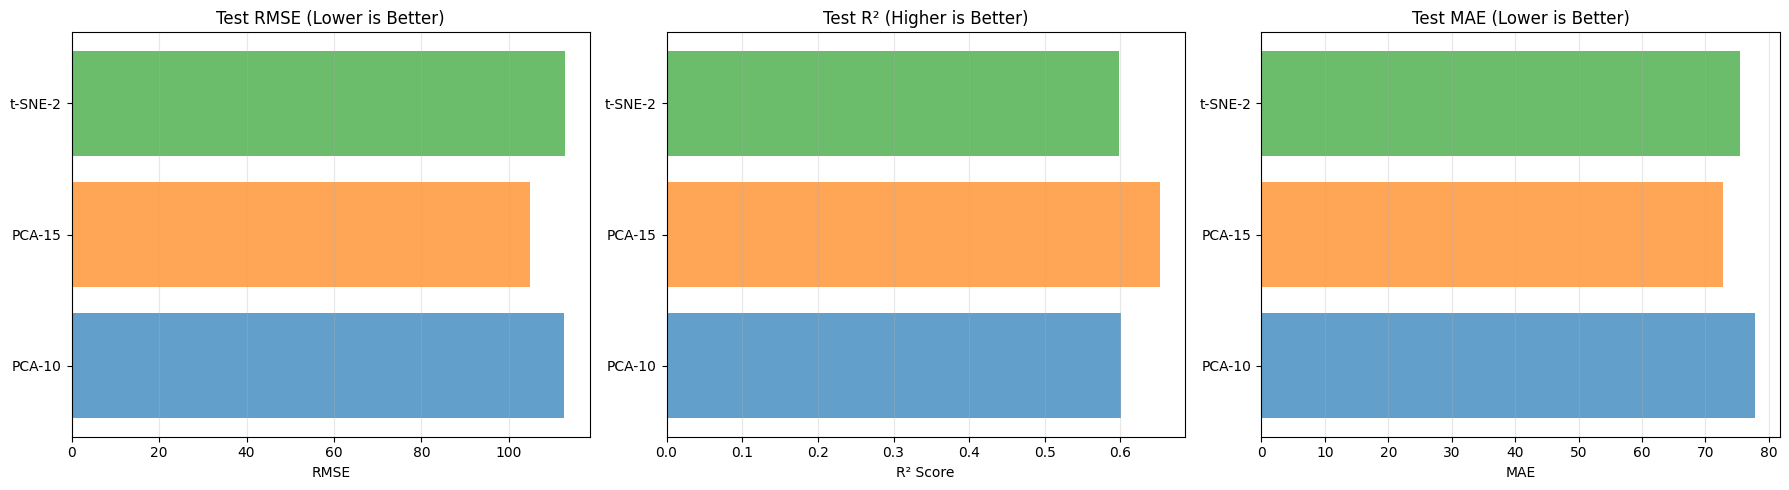

In [ ]:

# Visualize performance comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

methods = results_df['Method']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# RMSE
axes[0].barh(methods, results_df['Test RMSE'], color=colors, alpha=0.7)
axes[0].set_xlabel('RMSE')
axes[0].set_title('Test RMSE')
axes[0].grid(alpha=0.3, axis='x')

# R²
axes[1].barh(methods, results_df['Test R²'], color=colors, alpha=0.7)
axes[1].set_xlabel('R² Score')
axes[1].set_title('Test R²')
axes[1].grid(alpha=0.3, axis='x')

# Testing mean absolute errors
axes[2].barh(methods, results_df['Test MAE'], color=colors, alpha=0.7)
axes[2].set_xlabel('MAE')
axes[2].set_title('Test MAE')
axes[2].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


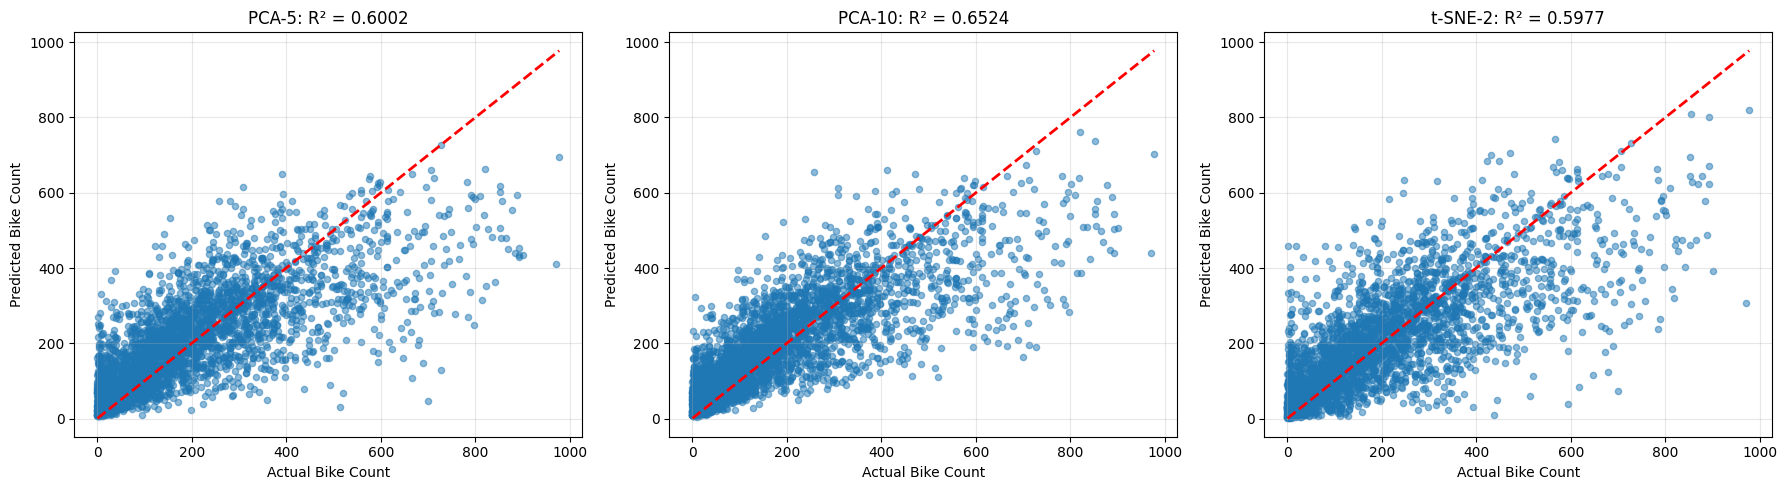

In [20]:
# Prediction vs Actual scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# PCA-10
axes[0].scatter(y_test, y_pred_test_pca10, alpha=0.5, s=20)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Bike Count')
axes[0].set_ylabel('Predicted Bike Count')
axes[0].set_title(f'PCA-5: R² = {results_df.loc[0, "Test R²"]:.4f}')
axes[0].grid(alpha=0.3)

# PCA-15
axes[1].scatter(y_test, y_pred_test_pca15, alpha=0.5, s=20)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Bike Count')
axes[1].set_ylabel('Predicted Bike Count')
axes[1].set_title(f'PCA-10: R² = {results_df.loc[1, "Test R²"]:.4f}')
axes[1].grid(alpha=0.3)

# t-SNE
axes[2].scatter(y_test, y_pred_test_tsne, alpha=0.5, s=20)
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[2].set_xlabel('Actual Bike Count')
axes[2].set_ylabel('Predicted Bike Count')
axes[2].set_title(f't-SNE-2: R² = {results_df.loc[2, "Test R²"]:.4f}')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

As a conclusion the t-SNE seems to perform in a very stable way, but with the given data we can not clearly deduct which is the best. There should be more studies with differen number of PC components and t-SNE components or iterations. In this case we have only 2 components on the t-SNE so it seems it has more power describing the data in a meaningful way.